In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# import Data

In [4]:
house_data=pd.read_csv('C:/Users/Pujar/Downloads/archive (1)/House Price Prediction Dataset.csv')
hp=pd.DataFrame(house_data)

In [5]:
hp.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [6]:
hp.tail()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119
1999,2000,2989,5,1,3,1903,Suburban,Fair,No,482525


In [7]:
hp.shape

(2000, 10)

# Data Preprocessing

In [8]:
hp.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [9]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [10]:
hp['Location'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Downtown
1       Downtown
2       Downtown
3       Suburban
4       Downtown
          ...   
1995    Suburban
1996    Suburban
1997       Rural
1998       Urban
1999    Suburban
Name: Location, Length: 2000, dtype: object>

In [11]:
hp['Location'].unique()

array(['Downtown', 'Suburban', 'Urban', 'Rural'], dtype=object)

In [13]:
hp.replace({'Location':{'Downtown':4,'Suburban':3,'Urban':2,'Rural':1}},inplace=True)
hp=hp.infer_objects(copy=False)

In [14]:
hp['Location'].value_counts

<bound method IndexOpsMixin.value_counts of 0       4
1       4
2       4
3       3
4       4
       ..
1995    3
1996    3
1997    1
1998    2
1999    3
Name: Location, Length: 2000, dtype: int64>

In [15]:
hp['Condition'].unique()

array(['Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

In [18]:
hp.replace({'Condition':{'Excellent':1,'Good':2,'Fair':3,'Poor':4}},inplace=True)
hp=hp.infer_objects(copy=False)

In [19]:
hp['Condition'].unique()

array([1, 2, 3, 4], dtype=int64)

In [20]:
hp['Garage'].value_counts

<bound method IndexOpsMixin.value_counts of 0        No
1        No
2        No
3       Yes
4       Yes
       ... 
1995     No
1996    Yes
1997     No
1998    Yes
1999     No
Name: Garage, Length: 2000, dtype: object>

In [21]:
hp['Garage'].unique()

array(['No', 'Yes'], dtype=object)

In [23]:
hp.replace({'Garage':{'No':0,'Yes':1}},inplace=True)
hp=hp.infer_objects(copy=False)

In [24]:
hp['Garage'].unique()

array([0, 1], dtype=int64)

In [25]:
hp.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,4,1,0,149919
1,2,4272,5,4,3,1958,4,1,0,424998
2,3,3592,2,2,3,1938,4,2,0,266746
3,4,966,4,2,2,1902,3,3,1,244020
4,5,4926,1,4,2,1975,4,3,1,636056


# define Feature and Target

In [26]:
x = hp.drop(['Price'],axis=1)
y = hp['Price']

In [27]:
print(x,y)

        Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0        1  1360         5          4       3       1970         4          1   
1        2  4272         5          4       3       1958         4          1   
2        3  3592         2          2       3       1938         4          2   
3        4   966         4          2       2       1902         3          3   
4        5  4926         1          4       2       1975         4          3   
...    ...   ...       ...        ...     ...        ...       ...        ...   
1995  1996  4994         5          4       3       1923         3          4   
1996  1997  3046         5          2       1       2019         3          4   
1997  1998  1062         5          1       2       1903         1          4   
1998  1999  4062         3          1       2       1936         2          1   
1999  2000  2989         5          1       3       1903         3          3   

      Garage  
0          0

# train test split

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=0.2,random_state=25)

In [32]:
print(x.shape,x_train.shape,x_test.shape)

(2000, 9) (1600, 9) (400, 9)


# select model

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model=LinearRegression()

In [35]:
# train the model with fit function
model.fit(x_train,y_train)

LinearRegression()

In [38]:
model.intercept_

467405.94919891027

In [39]:
model.coef_

array([-1.14887793e+01, -2.25444879e-01, -1.99925563e+03, -7.59535609e+02,
        2.00299146e+04,  1.39479159e+01,  1.18492330e+03,  5.99882482e+03,
        4.82494866e+03])

# prediction

In [40]:
# prediction on training data
train_pred=model.predict(x_train)

In [41]:
print(train_pred)

[516873.13685432 547952.55362401 538945.61793706 ... 562295.40838993
 521727.87545759 514002.50432095]


In [42]:
# prediction on test data
test_pred= model.predict(x_test)

# accuracy

In [44]:
from sklearn import metrics

In [46]:
# mean absolute error
result_1=metrics.mean_absolute_error(y_train,train_pred)
# R squared error
result_2=metrics.r2_score(y_train,train_pred)
print('Mean absolute error:',result_1)
print('R squared error:',result_2)

Mean absolute error: 237694.7971403877
R squared error: 0.0048383024524530915


In [47]:
# mean absolute error
result_1=metrics.mean_absolute_error(y_test,test_pred)
# R squared error
result_2=metrics.r2_score(y_test,test_pred)
print('Mean absolute error:',result_1)
print('R squared error:',result_2)

Mean absolute error: 242612.1874998835
R squared error: -0.002069962472744491


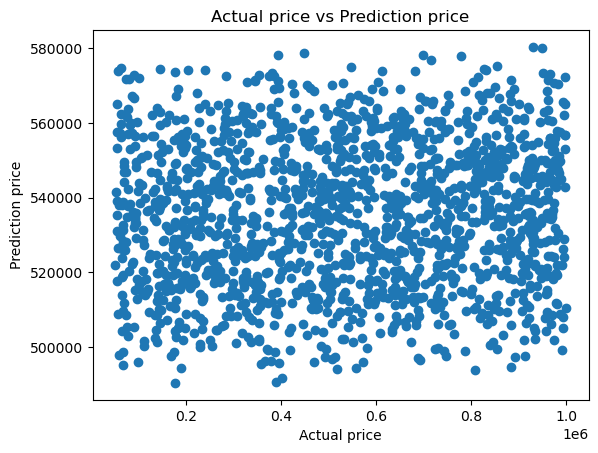

In [49]:
#scatter plot
plt.scatter(y_train,train_pred,label='Actual price vs Prediction price')
plt.xlabel('Actual price')
plt.ylabel('Prediction price')
plt.title('Actual price vs Prediction price')
plt.show()